In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from numpy import expand_dims

import tensorflow as tf
# from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import ResNet50

import skimage
from skimage import color

from keras import layers
import keras.backend as K
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Activation, Dropout
from keras.layers import Flatten, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 
from keras.applications.imagenet_utils import preprocess_input

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

### **Import Dataset**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Link Dataset : https://drive.google.com/drive/u/4/folders/1gxEloP2EN2OlMVjuDUp1jQWH8o6mr_sN

### **Dataset Overview**

In [ ]:
# Set the directory path to your Google Drive folder
drive_path = '/content/drive/MyDrive/Food Image/dataset-food-selected'

# path each image folder
path_img = []

for root, dirs, files in os.walk(drive_path):
  if root != drive_path:
    path_img.append(root)

path_img

['/content/drive/MyDrive/Food Image/dataset-food-selected/klapertart',
 '/content/drive/MyDrive/Food Image/dataset-food-selected/kerak-telor',
 '/content/drive/MyDrive/Food Image/dataset-food-selected/cendol',
 '/content/drive/MyDrive/Food Image/dataset-food-selected/asinan-jakarta',
 '/content/drive/MyDrive/Food Image/dataset-food-selected/gulai-ikan-asin',
 '/content/drive/MyDrive/Food Image/dataset-food-selected/ayam-goreng-lengkuas',
 '/content/drive/MyDrive/Food Image/dataset-food-selected/gado-gado',
 '/content/drive/MyDrive/Food Image/dataset-food-selected/bika-ambon',
 '/content/drive/MyDrive/Food Image/dataset-food-selected/ayam-bumbu-rujak',
 '/content/drive/MyDrive/Food Image/dataset-food-selected/es-dawet',
 '/content/drive/MyDrive/Food Image/dataset-food-selected/rendang',
 '/content/drive/MyDrive/Food Image/dataset-food-selected/rujak-cingur',
 '/content/drive/MyDrive/Food Image/dataset-food-selected/lumpia-semarang',
 '/content/drive/MyDrive/Food Image/dataset-food-selec

In [ ]:
# dataframe for images
df = pd.DataFrame(columns=['images','label','path'])

In [ ]:
df

,images,label,path


In [ ]:
# list of file image in image path (os.listdir)
listdir_img = []
for path in path_img:
  listdir_img.append(os.listdir(path))

In [ ]:
# get image file 
img_file = []
for i in range(len(listdir_img)):
  for j in range(len(listdir_img[i])):
    img_file.append(listdir_img[i][j])

In [ ]:
# add image file to column images in dataframe
df.loc[:, 'images'] = img_file

In [ ]:
df['images']

0         klapertart 0.jpg
1         klapertart 1.jpg
2         klapertart 2.jpg
3         klapertart 3.jpg
4         klapertart 4.jpg
               ...        
1245    soto-banjar 45.jpg
1246    soto-banjar 46.jpg
1247    soto-banjar 47.jpg
1248    soto-banjar 48.jpg
1249    soto-banjar 49.jpg
Name: images, Length: 1250, dtype: object

In [ ]:
label = []
paths = []
for image in df['images']:
    class_ = image.split(' ')[0]
    label.append(class_)
    paths.append(drive_path+'/'+class_+'/'+image)

df['label'] = label
df['path'] = paths

In [ ]:
df['label'] = df['label'].str.replace('-', ' ')

In [ ]:
df.head

<bound method NDFrame.head of                   images        label  \
0       klapertart 0.jpg   klapertart   
1       klapertart 1.jpg   klapertart   
2       klapertart 2.jpg   klapertart   
3       klapertart 3.jpg   klapertart   
4       klapertart 4.jpg   klapertart   
...                  ...          ...   
1245  soto-banjar 45.jpg  soto banjar   
1246  soto-banjar 46.jpg  soto banjar   
1247  soto-banjar 47.jpg  soto banjar   
1248  soto-banjar 48.jpg  soto banjar   
1249  soto-banjar 49.jpg  soto banjar   

                                                   path  
0     /content/drive/MyDrive/Food Image/dataset-food...  
1     /content/drive/MyDrive/Food Image/dataset-food...  
2     /content/drive/MyDrive/Food Image/dataset-food...  
3     /content/drive/MyDrive/Food Image/dataset-food...  
4     /content/drive/MyDrive/Food Image/dataset-food...  
...                                                 ...  
1245  /content/drive/MyDrive/Food Image/dataset-food...  
1246  /conten

In [ ]:
df.isna().sum()

images    0
label     0
path      0
dtype: int64

In [ ]:
print('Food Count: ',len(df['label'].value_counts()))
df['label'].value_counts()

Food Count:  25


klapertart              50
kue lumpur              50
sate ayam madura        50
sate meranggi           50
serabi                  50
soto ayam lamongan      50
laksa bogor             50
nagasari                50
kunyit asam             50
kolak                   50
mie aceh                50
papeda                  50
lumpia semarang         50
kerak telor             50
rujak cingur            50
rendang                 50
es dawet                50
ayam bumbu rujak        50
bika ambon              50
gado gado               50
ayam goreng lengkuas    50
gulai ikan asin         50
asinan jakarta          50
cendol                  50
soto banjar             50
Name: label, dtype: int64

### **Change file name**

In [ ]:
# # input def
# # path_coba = '/content/drive/MyDrive/Food Image/dataset-food-selected/COBA-COBA' #dir label 
# # img_file_coba = ['Bukti-report-supervisor.png','Bukti-report-supervisor2.png'] #label

# def rename_file_name (path_coba, img_file_coba):
#   # Specify the path and current name of the file --> '.../label/oldfile.jpg'
#   file_path = []
#   for i in img_file_coba:
#     file_path.append(os.path.join(path_coba, i))

#   # Specify the new name for the file --> 'label 1.jpg'
#   new_file_name = []
#   for i in range(len(img_file_coba)):
#     new_file_name_tmp = f'{os.path.basename(path_coba)} {str(i)}'
#     new_file_name.append(new_file_name_tmp)

#   # Construct the new file PATH with the NEW name file --> '.../label/label 1.jpg'
#   new_file_path = []
#   for i in new_file_name:
#     new_file_path.append(os.path.join(path_coba, i))

#   # Rename the file
#   for i in range(len(file_path)):
#     os.rename(file_path[i], new_file_path[i])

In [ ]:
# for i in range(len(path_img)):
#   rename_file_name(path_img[i], listdir_img[i])

### **Data Augmentation**

In [ ]:
def show_augmented_images(paths, datagen):
    plt.figure(figsize = (14,28))
    plt.suptitle('Augmented Images')
    
    midx = 0
    for path in paths:
        # open image from dataset
        img = Image.open(path) 
        # resize image
        img = img.resize((227,227)) 
        samples = expand_dims(img, 0)
        it = datagen.flow(samples, batch_size=1)
    
        # show original images
        plt.subplot(10, 5, midx+1)
        plt.imshow(img)
        plt.axis('off')
    
        # show augmented images
        for idx, i in enumerate(range(4)):
            midx += 1
            plt.subplot(10,5, midx+1)
            
            batch = it.next()
            image = batch[0].astype('uint8')
            plt.imshow(image)
            plt.axis('off')
        midx += 1
  
    plt.show()

### **Splitting Data**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df[['path', 'label']], df[['label']], test_size=0.2, random_state=32)

In [ ]:
X_train.head()

,path,label
835,/content/drive/MyDrive/Food Image/dataset-food...,kolak
471,/content/drive/MyDrive/Food Image/dataset-food...,es dawet
323,/content/drive/MyDrive/Food Image/dataset-food...,gado gado
977,/content/drive/MyDrive/Food Image/dataset-food...,laksa bogor
1087,/content/drive/MyDrive/Food Image/dataset-food...,serabi


In [ ]:
X_val.head()

,path,label
508,/content/drive/MyDrive/Food Image/dataset-food...,rendang
765,/content/drive/MyDrive/Food Image/dataset-food...,mie aceh
918,/content/drive/MyDrive/Food Image/dataset-food...,nagasari
1164,/content/drive/MyDrive/Food Image/dataset-food...,sate ayam madura
1226,/content/drive/MyDrive/Food Image/dataset-food...,soto banjar


In [ ]:
y_train.head()

,label
835,kolak
471,es dawet
323,gado gado
977,laksa bogor
1087,serabi


In [ ]:
y_val.head()

,label
508,rendang
765,mie aceh
918,nagasari
1164,sate ayam madura
1226,soto banjar


### **RESNET50**

In [ ]:
# Change image from RGB to BGR
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.10,
    brightness_range=[0.6,1.4],
    channel_shift_range=0.7,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
) 


train_generator = datagen.flow_from_dataframe(
        X_train,  
        x_col='path',
        y_col='label',
        target_size=(227, 227),  
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
)
val_generator = datagen.flow_from_dataframe(
        X_val,  
        x_col='path',
        y_col='label',
        target_size=(227, 227), 
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
)

Found 1000 validated image filenames belonging to 25 classes.
Found 250 validated image filenames belonging to 25 classes.


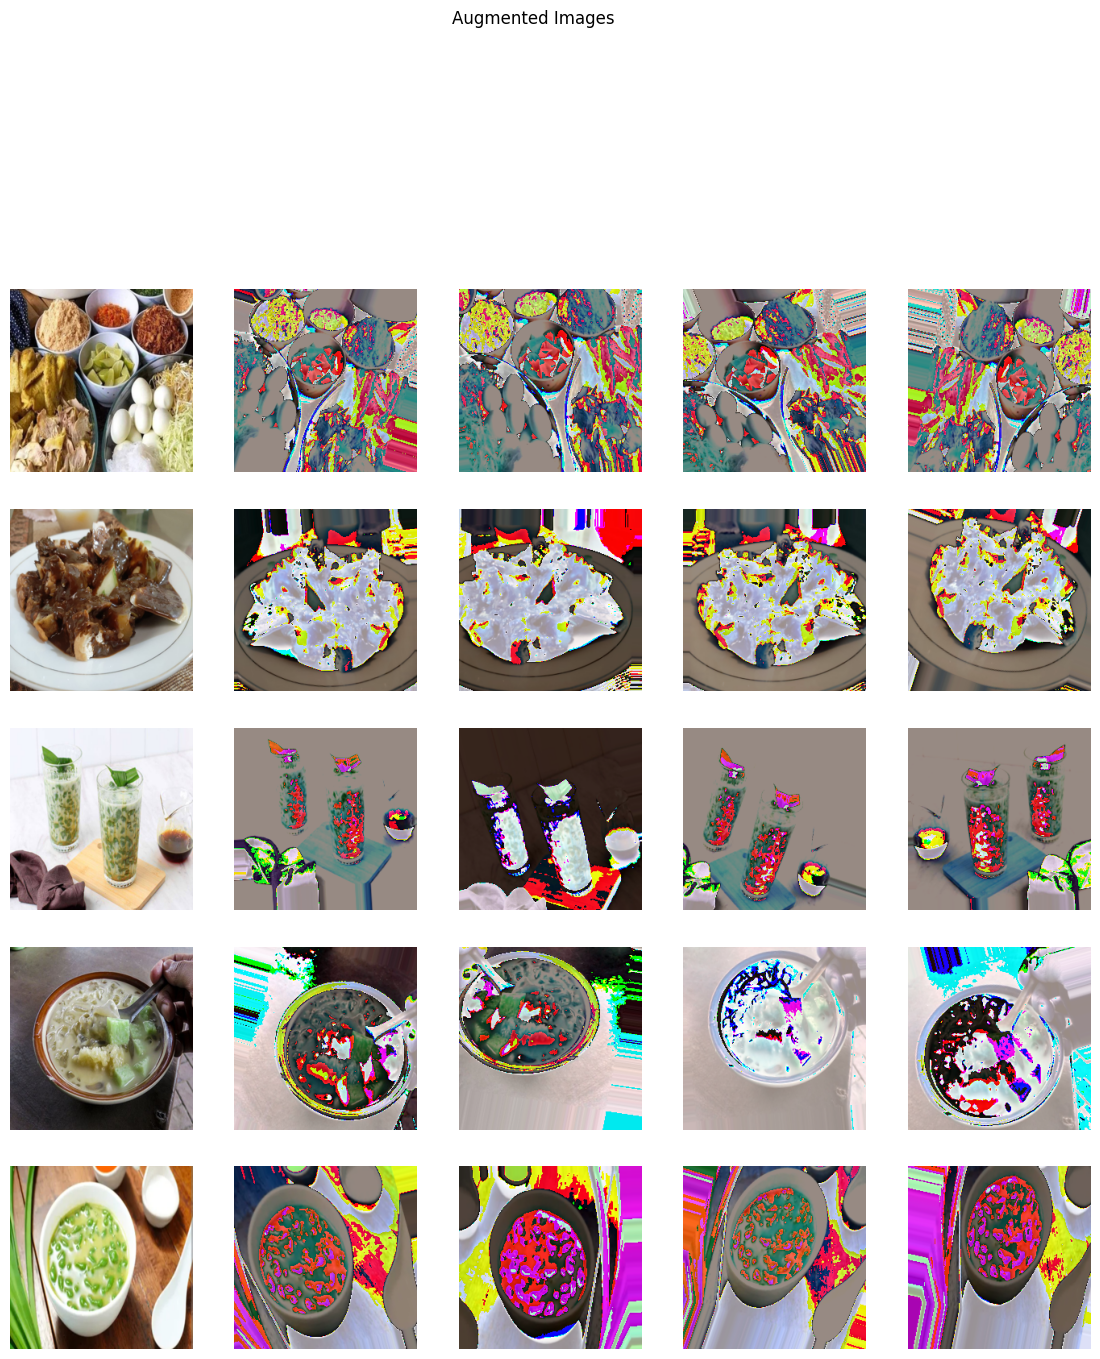

In [ ]:
# show 10 original images and its augmentation
show_augmented_images(np.random.choice(X_train['path'],5), datagen) 

In [ ]:
resnet50 = ResNet50(include_top = False, input_shape = (227,227,3), weights = 'imagenet')

for layer in resnet50.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(resnet50.output)
predictions = Dense(25, activation='softmax')(x)

model = Model(inputs = resnet50.input, outputs = predictions)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 233, 233, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 114, 114, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer="adam", 
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
model_history = model.fit(
      train_generator,
      validation_data=val_generator,
      epochs=50,
      verbose=2)

Epoch 1/50
32/32 - 348s - loss: 2.6835 - accuracy: 0.2430 - precision: 0.8269 - recall: 0.0430 - val_loss: 1.9180 - val_accuracy: 0.4520 - val_precision: 0.8600 - val_recall: 0.1720 - 348s/epoch - 11s/step
Epoch 2/50
32/32 - 328s - loss: 1.3401 - accuracy: 0.6380 - precision: 0.9396 - recall: 0.3110 - val_loss: 1.2912 - val_accuracy: 0.6400 - val_precision: 0.8788 - val_recall: 0.3480 - 328s/epoch - 10s/step
Epoch 3/50
32/32 - 339s - loss: 0.9481 - accuracy: 0.7460 - precision: 0.9235 - recall: 0.4950 - val_loss: 1.1436 - val_accuracy: 0.6360 - val_precision: 0.8657 - val_recall: 0.4640 - 339s/epoch - 11s/step
Epoch 4/50
32/32 - 331s - loss: 0.7450 - accuracy: 0.8040 - precision: 0.9340 - recall: 0.6090 - val_loss: 1.0149 - val_accuracy: 0.7000 - val_precision: 0.8411 - val_recall: 0.5080 - 331s/epoch - 10s/step
Epoch 5/50
32/32 - 339s - loss: 0.6150 - accuracy: 0.8470 - precision: 0.9386 - recall: 0.6880 - val_loss: 1.0302 - val_accuracy: 0.6480 - val_precision: 0.8261 - val_recall: 0

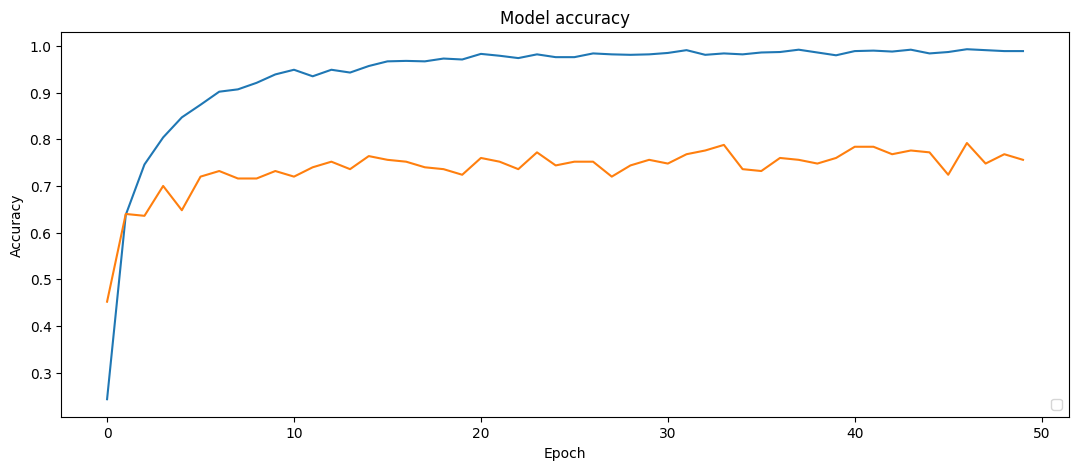

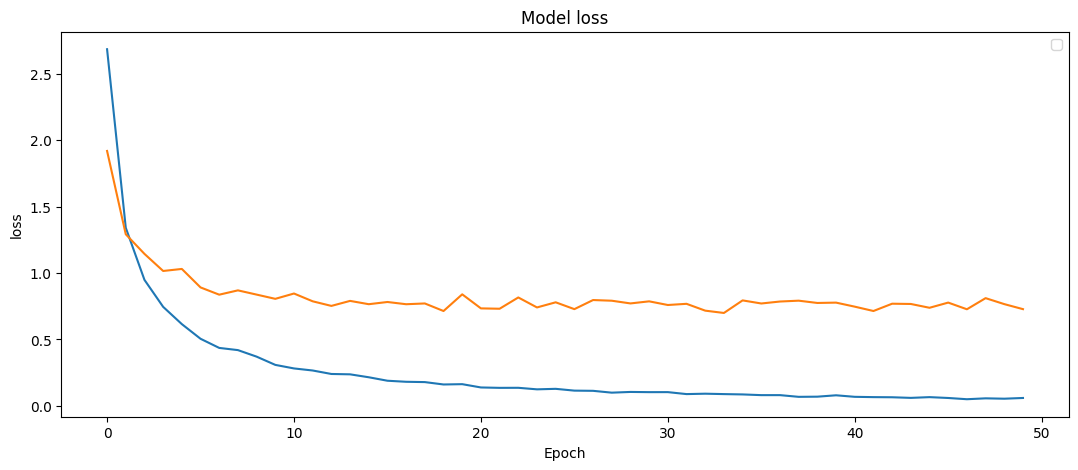

In [ ]:
plt.figure(figsize=(13,5))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(13,5))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# get sequence of label from dataset
class_indices = train_generator.class_indices

label_sequence = [class_name for class_name, index in sorted(class_indices.items(), key=lambda x: x[1])]
print("Label sequence:", label_sequence)

Label sequence: ['asinan jakarta', 'ayam bumbu rujak', 'ayam goreng lengkuas', 'bika ambon', 'cendol', 'es dawet', 'gado gado', 'gulai ikan asin', 'kerak telor', 'klapertart', 'kolak', 'kue lumpur', 'kunyit asam', 'laksa bogor', 'lumpia semarang', 'mie aceh', 'nagasari', 'papeda', 'rendang', 'rujak cingur', 'sate ayam madura', 'sate meranggi', 'serabi', 'soto ayam lamongan', 'soto banjar']


In [ ]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():
  # Load and preprocess the image
  path = '/content/' + fn
  img = load_img(path, target_size=(227, 227))
  img = img_to_array(img)
  img = preprocess_input(img)
  img = np.expand_dims(img, axis=0)

  # Predict the image
  label = model.predict(img)
  print(label[0])
  print("=================")
  pred = np.argmax(label[0])
  print("Index ke-", pred)
  print("Probabilitasnya : ",label[0][pred])
  print(f'Image {fn} is a {label_sequence[pred]}')

In [ ]:
# resnet50_datagen = ImageDataGenerator(
#     rotation_range=20,
#     zoom_range=0.10,
#     brightness_range=[0.6,1.4],
#     channel_shift_range=0.7,
#     width_shift_range=0.15,
#     height_shift_range=0.15,
#     shear_range=0.15,
#     horizontal_flip=True,
#     fill_mode='nearest',
#     preprocessing_function=preprocess_input
# ) 